In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy as scp
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from scipy import stats

In [63]:
df = pd.read_csv('laptop.csv')

df.head()

,Unnamed: 0,model_name,brand,processor_name,ram(GB),ssd(GB),Hard Disk(GB),Operating System,graphics,screen_size(inches),resolution (pixels),no_of_cores,no_of_threads,spec_score,price
0,0,Lenovo V15 ITL G2 82KBA033IH Laptop,Lenovo,11th Gen Core i3,8,512,0,Windows,Intel Integrated UHD,15.6,1920 x 1080,2,4,62,33921
1,1,HP Pavilion 15-ec2004AX Gaming Laptop,HP,AMD Ryzen 5 5600H,8,512,0,Windows,4 GB NVIDIA GeForce GTX 1650,15.6,1920 x 1080,6,12,66,56150
2,2,Lenovo V15 82KBA03HIH Laptop,Lenovo,11th Gen Core i3,8,256,1000,Windows,Intel Integrated UHD,15.6,1920 x 1080,2,4,66,35499
3,3,Asus Vivobook 16X 2022 M1603QA-MB502WS Laptop,Asus,Ryzen 5-5600H,8,512,0,Windows,AMD Radeon Vega 7,16.0,1200 x 1920,6,12,66,48990
4,4,HP 15s-fr4000TU Laptop,HP,11th Gen Core i5,8,512,0,Windows,Intel Integrated Iris Xe,15.6,1920 x 1080,4,8,63,52990


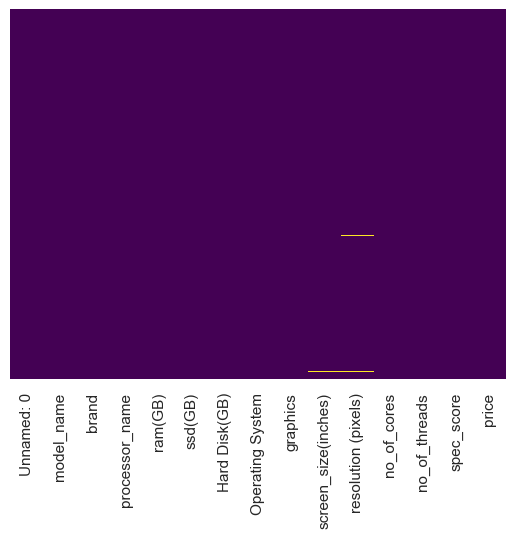

In [64]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [65]:
# Data Cleaning
df_cleaned = df.drop(columns=['Unnamed: 0'])

df_cleaned.columns = [
    'model_name', 'brand', 'processor_name', 'ram_GB', 'ssd_GB', 'hard_disk_GB',
    'operating_system', 'graphics', 'screen_size_inches', 'resolution_pixels', 
    'no_of_cores', 'no_of_threads', 'spec_score', 'price'
]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          1014 non-null   object 
 1   brand               1014 non-null   object 
 2   processor_name      1014 non-null   object 
 3   ram_GB              1014 non-null   int64  
 4   ssd_GB              1014 non-null   int64  
 5   hard_disk_GB        1014 non-null   int64  
 6   operating_system    1014 non-null   object 
 7   graphics            1014 non-null   object 
 8   screen_size_inches  1012 non-null   float64
 9   resolution_pixels   1011 non-null   object 
 10  no_of_cores         1014 non-null   int64  
 11  no_of_threads       1014 non-null   int64  
 12  spec_score          1014 non-null   int64  
 13  price               1014 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 111.0+ KB


In [66]:
df_cleaned['screen_size_inches'].fillna(df_cleaned['screen_size_inches'].mean(), inplace=True)
df_cleaned['resolution_pixels'].fillna(df_cleaned['resolution_pixels'].mode()[0], inplace=True)

df_cleaned.isnull().sum()

model_name            0
brand                 0
processor_name        0
ram_GB                0
ssd_GB                0
hard_disk_GB          0
operating_system      0
graphics              0
screen_size_inches    0
resolution_pixels     0
no_of_cores           0
no_of_threads         0
spec_score            0
price                 0
dtype: int64

C:\Users\Abhisar Gupta\AppData\Local\Temp\ipykernel_19944\3697733610.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['resolution_pixels'], ax=axes[1, 2], palette='cool')


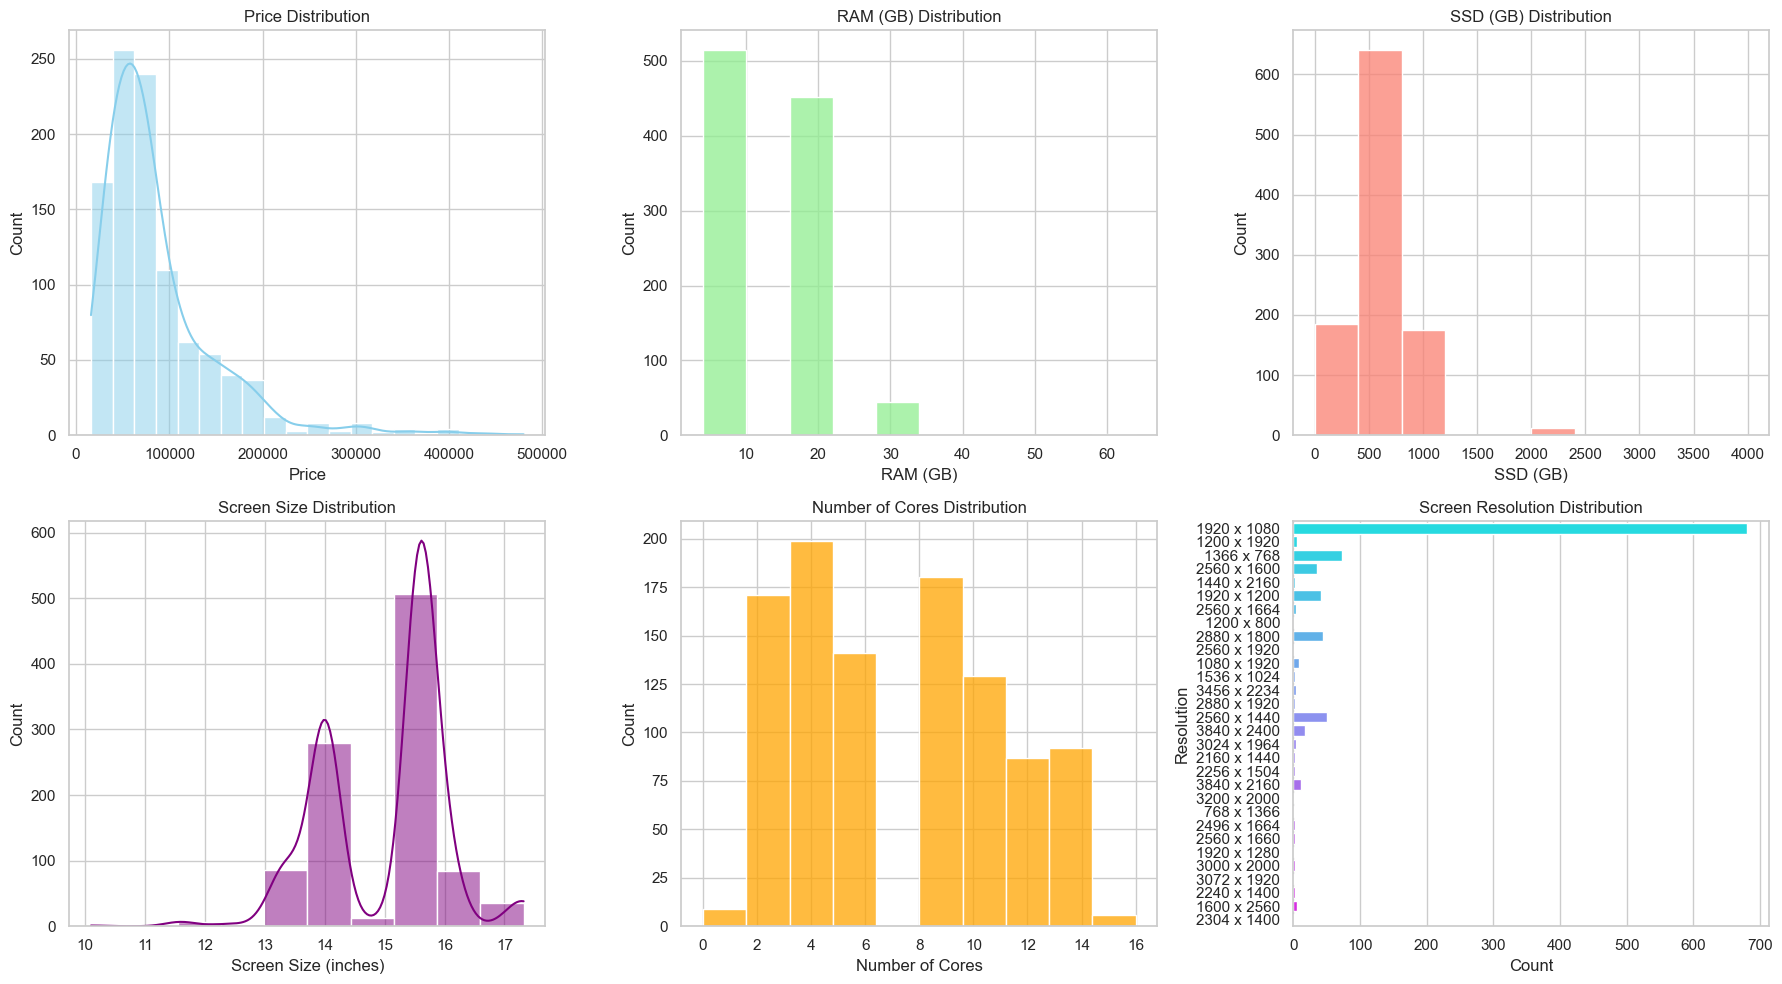

In [67]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(df_cleaned['price'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price')

sns.histplot(df_cleaned['ram_GB'], bins=10, kde=False, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('RAM (GB) Distribution')
axes[0, 1].set_xlabel('RAM (GB)')

sns.histplot(df_cleaned['ssd_GB'], bins=10, kde=False, ax=axes[0, 2], color='salmon')
axes[0, 2].set_title('SSD (GB) Distribution')
axes[0, 2].set_xlabel('SSD (GB)')

sns.histplot(df_cleaned['screen_size_inches'], bins=10, kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Screen Size Distribution')
axes[1, 0].set_xlabel('Screen Size (inches)')

sns.histplot(df_cleaned['no_of_cores'], bins=10, kde=False, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Number of Cores Distribution')
axes[1, 1].set_xlabel('Number of Cores')

sns.countplot(y=df_cleaned['resolution_pixels'], ax=axes[1, 2], palette='cool')
axes[1, 2].set_title('Screen Resolution Distribution')
axes[1, 2].set_xlabel('Count')
axes[1, 2].set_ylabel('Resolution')

plt.tight_layout()
plt.show()


C:\Users\Abhisar Gupta\AppData\Local\Temp\ipykernel_19944\819849775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ram_GB', y='price', data=df_cleaned, palette='Set2')


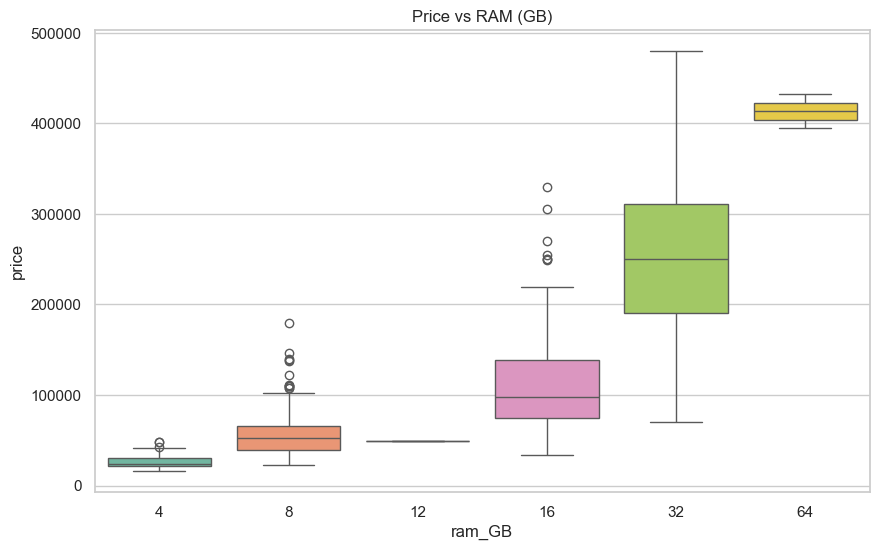

C:\Users\Abhisar Gupta\AppData\Local\Temp\ipykernel_19944\819849775.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='price', data=df_cleaned, palette='Set3')


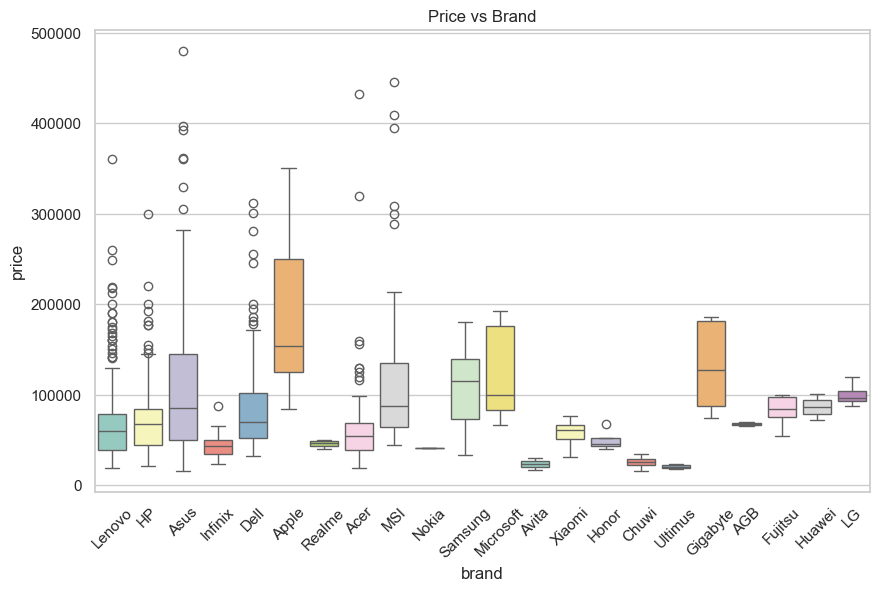

In [68]:
# Price vs RAM
plt.figure(figsize=(10, 6))
sns.boxplot(x='ram_GB', y='price', data=df_cleaned, palette='Set2')
plt.title('Price vs RAM (GB)')
plt.show()

# Price vs Brand
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='price', data=df_cleaned, palette='Set3')
plt.title('Price vs Brand')
plt.xticks(rotation=45)
plt.show()


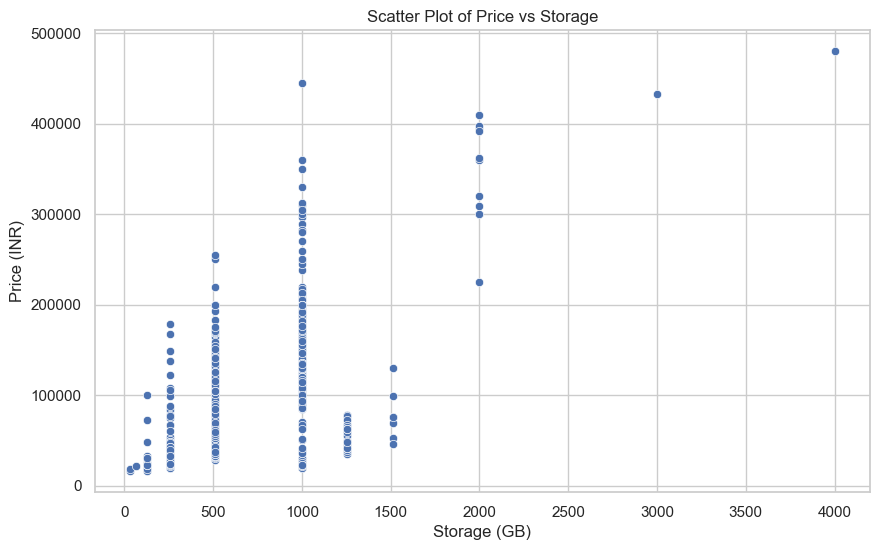

In [69]:
# Scatter plot for Storage vs Price
plt.figure(figsize=(10, 6))
storage = df_cleaned.ssd_GB + df_cleaned.hard_disk_GB
sns.scatterplot(data=df_cleaned, x=storage, y='price')
plt.title('Scatter Plot of Price vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Price (INR)')
plt.show()

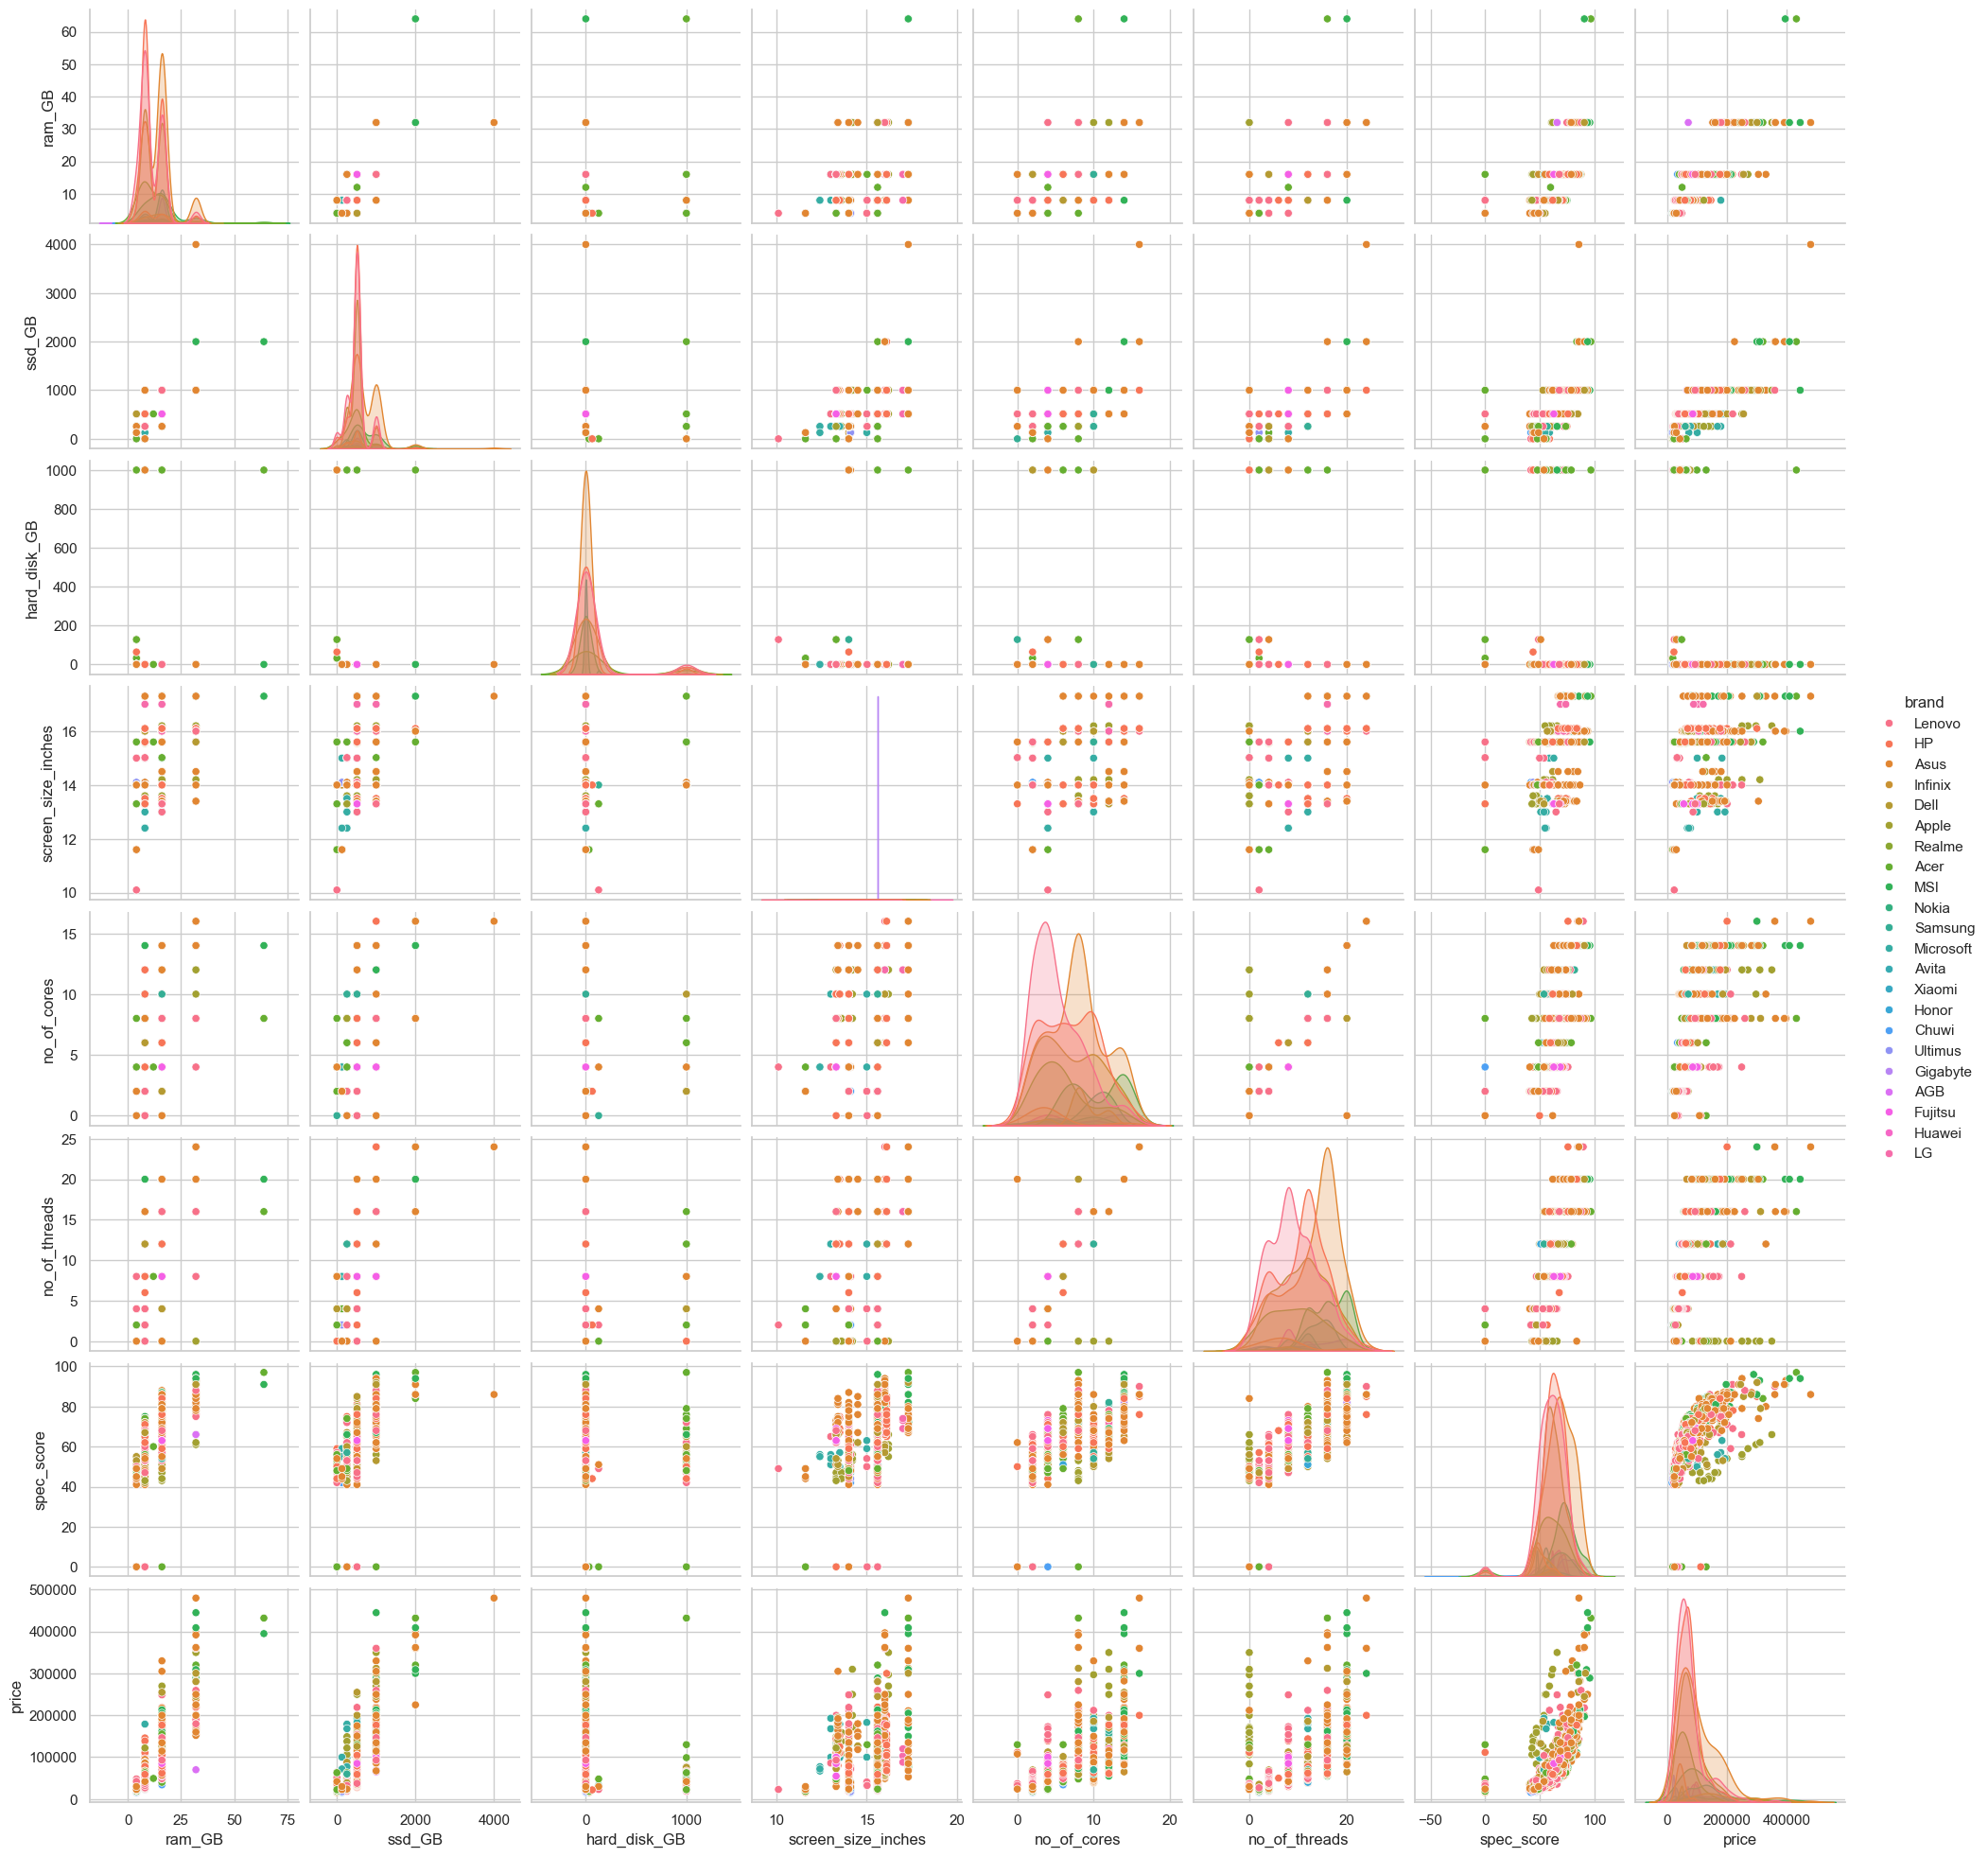

In [70]:
# numerical and numerical 
g = sns.pairplot(df_cleaned, hue = 'brand')

In [71]:
#categorical and Numerical : ANOVA
anova_results = stats.f_oneway(*[group['price'].values for name, group in df_cleaned.groupby('brand')])

print("ANOVA results for Price by Brand:")
print(f"F-statistic: {anova_results.statistic}")
print(f"P-value: {anova_results.pvalue}")

anova_results_os = stats.f_oneway(
    *[group['price'].values for name, group in df_cleaned.groupby('operating_system')]
)

print("\nANOVA results for Price by Operating System:")
print(f"F-statistic: {anova_results_os.statistic}")
print(f"P-value: {anova_results_os.pvalue}")

if anova_results_os.pvalue > 0.05 :
    print('Failed to reject null hypothesis')
else :
    print('Reject thenull hypothesis : group  mean is significantly diffrenet.')

ANOVA results for Price by Brand:
F-statistic: 7.920724664512046
P-value: 1.7736117802431515e-22

ANOVA results for Price by Operating System:
F-statistic: 18.60293507015119
P-value: 9.158385947656385e-15
Reject thenull hypothesis : group  mean is significantly diffrenet.


In [72]:
# Mean, and five number summary
df_cleaned.describe()

,ram_GB,ssd_GB,hard_disk_GB,screen_size_inches,no_of_cores,no_of_threads,spec_score,price
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,12.485207,560.591716,62.761341,15.018320,7.043393,10.962525,63.608481,87386.668639
std,6.371308,310.600496,241.494091,1.035795,3.868021,5.620139,13.390836,62815.143328
min,4.000000,0.000000,0.000000,10.100000,0.000000,0.000000,0.000000,15990.000000
25%,8.000000,512.000000,0.000000,14.000000,4.000000,8.000000,56.000000,46999.250000
50%,8.000000,512.000000,0.000000,15.600000,6.000000,12.000000,63.000000,69900.000000
75%,16.000000,512.000000,0.000000,15.600000,10.000000,16.000000,72.000000,104890.000000
max,64.000000,4000.000000,1000.000000,17.320000,16.000000,24.000000,97.000000,479990.000000


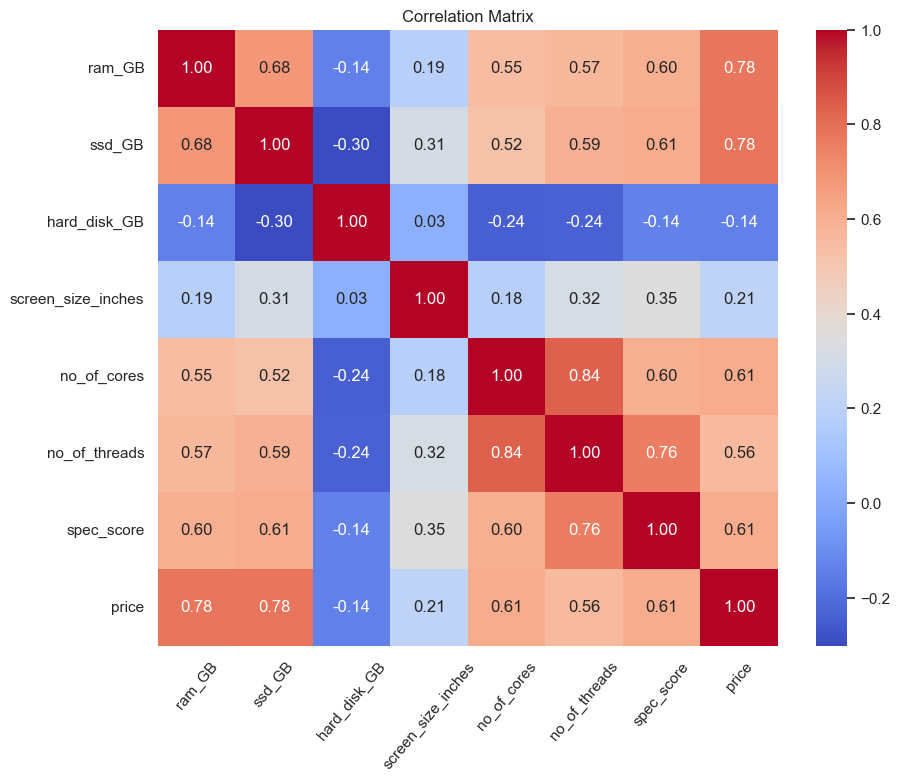

In [73]:
# Correlation Matrix
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_cleaned[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation = 50)
plt.show()